In [162]:
#Install NLTK library.
!pip install nltk

In [163]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [164]:
#Loading the dataset
data ="/content/sentimentdataset.csv"
df = pd.read_csv(data)

In [165]:
#Preview the first 3 rows of the dataset
df.head(3)

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15


In [166]:
#Check the shape of the data(Rows, Columns)
df.shape

(732, 15)

In [167]:
#List all the column name
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [168]:
#Cheacking for any missing value in all the columns
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Text,0
Sentiment,0
Timestamp,0
User,0
Platform,0
Hashtags,0
Retweets,0
Likes,0


In [170]:
#Importing the Regular expression library for text cleaning
import re

#Defining function to clean the text data
def clean_text(text):
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply the safe cleaning function
df['cleaned_text'] = df['Text'].apply(clean_text)


In [172]:
#Tokenizing the cleaned data in seperate words
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
df['tokens'] = df['cleaned_text'].apply(word_tokenize)


from nltk.corpus import stopwords
stop_words = set(stopwords.words('english', 'the'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [136]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour', 'cleaned_text', 'tokens'],
      dtype='object')

In [137]:
custom_stop_words = set(stopwords.words('english'))
# Add additional domain-specific stop words
additional_stop_words = {'and', 'the'}
stop_words = custom_stop_words.union(additional_stop_words)

#Apply the updated stopwords to remove from tokens
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

In [173]:
from nltk.stem import WordNetLemmatizer
nltk.download('vader_lexicon')
nltk.download('wordnet')

# Lemmatize (reduce words to their base form) the tokens
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Perform sentiment analysis using Vader's SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
df['sentiment_scores'] = df['cleaned_text'].apply(lambda x: sid.polarity_scores(x))

# Categorize sentiment as positive, negative, or neutral based on compound score
df['sentiment'] = df['sentiment_scores'].apply(lambda x: 'positive' if x['compound'] > 0 else ('negative' if x['compound'] < 0 else 'neutral'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [144]:
# Check the distribution of sentiment categories
df['sentiment'].value_counts()

,count
sentiment,
positive,464
negative,189
neutral,79


In [143]:
# Print descriptive statistics of the dataset
print(df.describe())
print(df['sentiment'].value_counts())

       Unnamed: 0.1  Unnamed: 0    Retweets       Likes         Year  \
count    732.000000  732.000000  732.000000  732.000000   732.000000   
mean     366.464481  369.740437   21.508197   42.901639  2020.471311   
std      211.513936  212.428936    7.061286   14.089848     2.802285   
min        0.000000    0.000000    5.000000   10.000000  2010.000000   
25%      183.750000  185.750000   17.750000   34.750000  2019.000000   
50%      366.500000  370.500000   22.000000   43.000000  2021.000000   
75%      549.250000  553.250000   25.000000   50.000000  2023.000000   
max      732.000000  736.000000   40.000000   80.000000  2023.000000   

            Month         Day        Hour  
count  732.000000  732.000000  732.000000  
mean     6.122951   15.497268   15.521858  
std      3.411763    8.474553    4.113414  
min      1.000000    1.000000    0.000000  
25%      3.000000    9.000000   13.000000  
50%      6.000000   15.000000   16.000000  
75%      9.000000   22.000000   19.000000  

In [146]:
# Split the dataset into training and testing sets for model training
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df['cleaned_text']   # Features are the cleaned text
y = df['sentiment']      # Labels are the sentiment categories
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data (convert text to numeric format using CountVectorizer)
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test data
predictions = model.predict(X_test_vectorized)

# Print classification report to evaluate the model's performance
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.79      0.67      0.72        39
     neutral       0.40      0.15      0.22        13
    positive       0.79      0.91      0.84        95

    accuracy                           0.78       147
   macro avg       0.66      0.58      0.60       147
weighted avg       0.75      0.78      0.76       147



In [174]:
# Check the unique labels in your test set
print(y_test.unique())

['positive' 'negative' 'neutral']


Confusion Matrix:


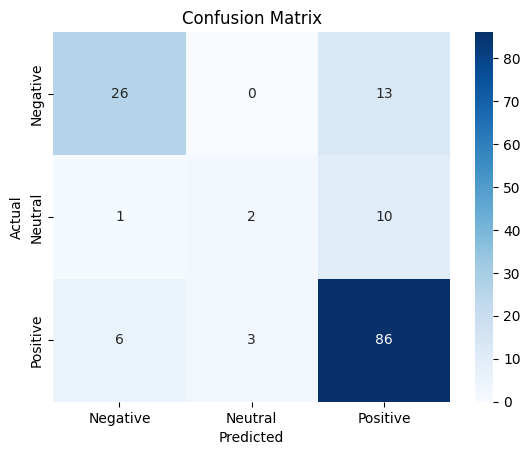

In [161]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# After making predictions with your model
predictions = model.predict(X_test_vectorized)

# Print the confusion matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, predictions)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [149]:
# Print accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.78


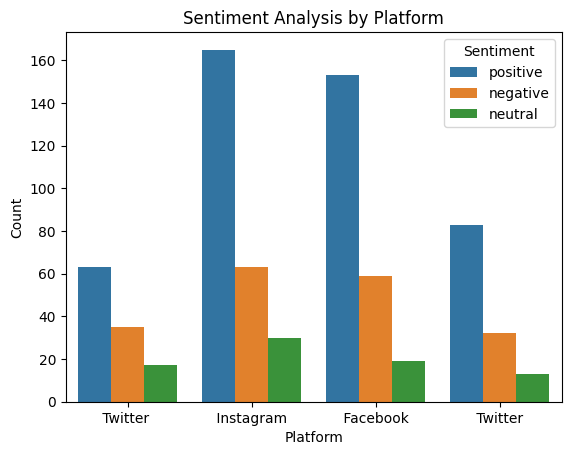

In [150]:
# Visualize the sentiment distribution by platform.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Platform', hue='sentiment', data=df)
plt.title('Sentiment Analysis by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

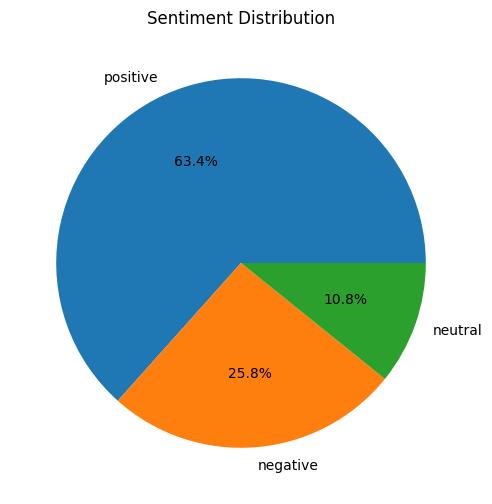

In [151]:
# Pie chart for sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

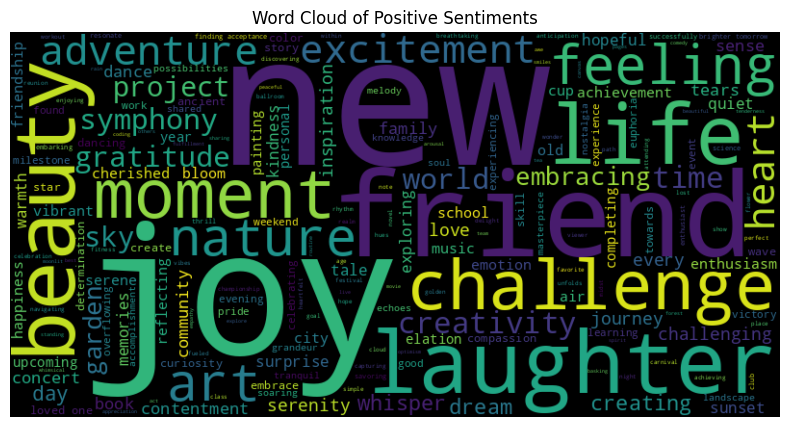

In [152]:
# Word Cloud for Positive Sentiments
from wordcloud import WordCloud

positive_words = ' '.join(df[df['sentiment'] == 'positive']['cleaned_text'])
wordcloud = WordCloud(width=800, height=400).generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Positive Sentiments')
plt.show()

In [153]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour', 'cleaned_text', 'tokens', 'lemmatized',
       'sentiment_scores', 'sentiment', 'stemmed'],
      dtype='object')

<ipython-input-154-268263ea371a>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M').sentiment.value_counts().unstack().plot()


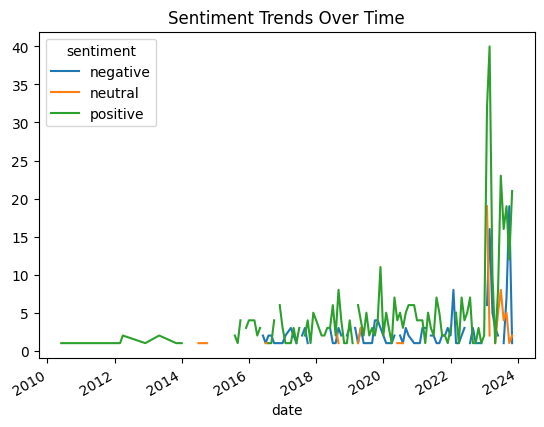

In [154]:
df['date'] = pd.to_datetime(df['Timestamp'])
df.set_index('date', inplace=True)

# Plot sentiment trends over time, resampled by month
df.resample('M').sentiment.value_counts().unstack().plot()
plt.title('Sentiment Trends Over Time')
plt.show()